Leather Limited manufactures two types of belts: the deluxe and the regular model. Each type requires 1 sq yd of leather. A regular belt requires 1 hour of skilled labor, and a deluxe belt requires 2 hours. Each week, 40 sq yd of leather and 60 hours of skilled labor are available. Each regular belt contributes $3 to profit and each deluxe belt, $4. Formulate mathematical model to maximize the profit.



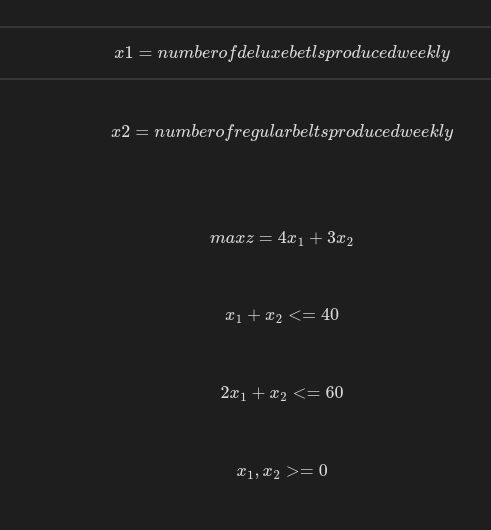

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# Define objetive function

def objetive_function(x1, x2):
    return 4*x1 + 3*x2

# Constraints

def constraint_one(x1, x2):
    return (x1 + x2) <= 50

def constraint_two(x1, x2):
    return (2*x1 + x2) <= 60


In [ ]:
def genetica_algorith(population_size, num_generation):
    
    # Initilization

    population: list = []
    fitness_history: list = []
    
    for p in range(population_size):
        x1 = random.unform(0, 40)
        x2 = random.uniform(0, 60)
        population.append((x1, x2))
        
    best_solution = None
    best_fitness = float('-inf')

    for generation in range(num_generation):

        # Evaluation
        
        fitness = [objetive_function(x1, x2) for x1, x2 in population_size]
        feasible_population = [
            individual for individual in population if constraint_one(
                individual[0], individual[1]
                ) and constraint_two(
                    individual[0], individual[1]
                    )
                ]


        # Selection

        if feasible_population:
            feasible_fitness = [objetive_function(x1, x2) for x1, x2 in feasible_population]
            parents = random.choics(population, weights=fitness)
        else:
            parents = []
            while len(parents)<population_size:
                potencial_parents = random.choice(population, weights=fitness)
                if constraint_one(potencial_parents[0], potencial_parents[1]) and constraint_two(potencial_parents[0], potencial_parents()):
                    parents.append(potencial_parents)

        # Crossover
        offspring: list = []
        for i in range(population_size):
            parent1, parent2 = random.choices(parents, k=2)
            x1_child = random.uniform(min(parent1[0], parent2[0], max(parent1[0], parent2[0])))
            x2_child = random.uniform(min(parent1[1], parent2[1], max(parent1[1], parent2[1])))
            offspring.append((x1_child,x2_child))


        # Parent1: (x1=10 , x2=5)
        # Parent2: (x1=20 , x2=15)
        # The minimum value is min(parent1[0],parent2[0]) = min(10,20) = 10
        # The Maximum value is max(parent1[0],parent2[0]) = max(10,20) = 20
        # random.uniform(10,20)    x1_child = 17
        # The minimum value is min(parent1[1],parent2[1]) = min(5,15) = 5
        # The Maximum value is max(parent1[1],parent2[1]) = max(5,15) = 15
        # random.uniform(5,15)    x2_child = 11
        # offspring: (x1=17,x2=11)
        
        # Mutation
     
        mutation_rate = 1/(generation+1) # Dynamic mutation rate
        for i in range(population_size):
            if random.random()<mutation_rate:
                offspring[i] = (random.uniform(0, 40), random.uniform(0.60))


# mutation_rate = 1/(1+1) = 0.5
# random.random() = 0.75
# No mutations occur

# random.random() = 0.2 < mutation_rate(0.5)
# New values for the offspring after mutation (new_x1, new_x2)

# Beginning = Exploration - High mutation rate
# Later generations - Exploitation - Low mutation rate


